<a href="https://colab.research.google.com/github/Yusuprozimemet/GPS_Ancestry_Migration_Map/blob/main/Temporal_Evolution_of_Genetic_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

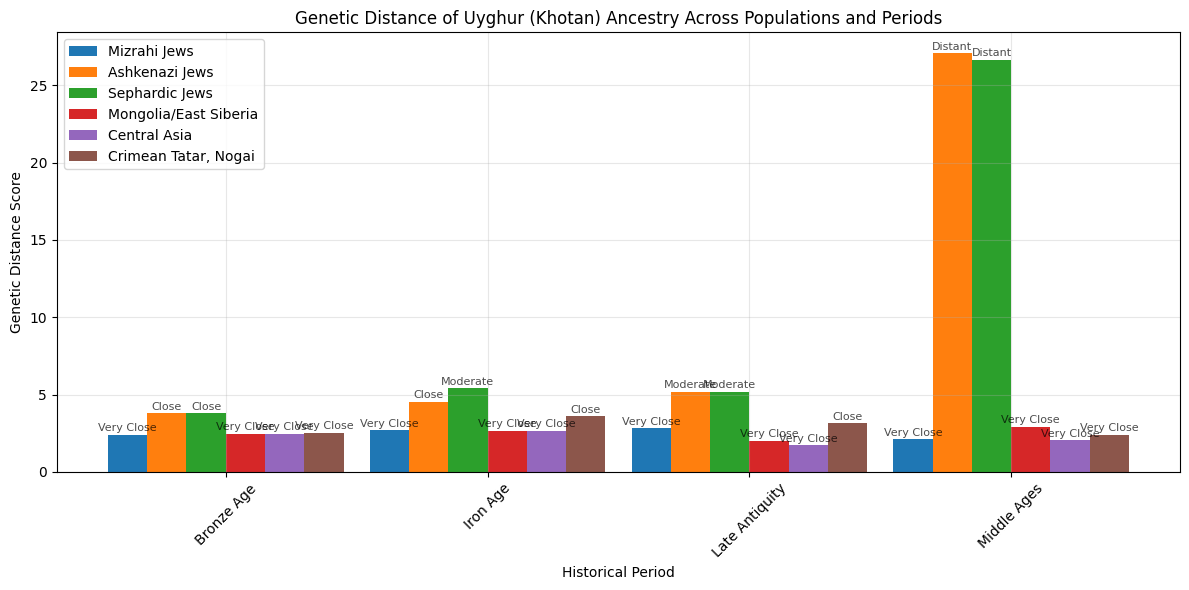

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from your Illustrative DNA results
data = {
    'Population': ['Mizrahi Jews', 'Ashkenazi Jews', 'Sephardic Jews', 'Mongolia/East Siberia',
                   'Anatolian Turks, Greeks', 'Caucasus', 'Iran, Iraq', 'Indian subcontinent',
                   'Central Asia', 'Japan', 'Native American', 'Crimean Tatar, Nogai',
                   'Eastern Europe', 'Balkan East', 'Balkan West', 'Italy Southwest',
                   'Central Europe', 'Levant Peninsula', 'Arabia'],
    'Bronze Age': [2.409, 3.783, 3.789, 2.444, 2.594, 2.594, 2.400, 2.339, 2.443, 25.810,
                   2.228, 2.538, 10.436, 2.434, 2.434, 4.776, 23.984, 2.751, 2.752],
    'Iron Age': [2.680, 4.520, 5.393, 2.670, 3.426, 3.932, 2.680, 2.599, 2.644, 5.870,
                 2.210, 3.579, 2.700, 2.490, 2.490, 29.543, 28.229, 2.686, 2.386],
    'Late Antiquity': [2.813, 5.192, 5.192, 1.999, 3.343, 3.747, 2.813, 2.713, 1.722, 19.575,
                       1.587, 3.140, 4.175, 3.156, 3.156, 27.514, 28.918, 17.868, 2.391],
    'Middle Ages': [2.103, 27.080, 26.662, 2.907, 3.117, 3.065, 2.117, 2.187, 2.054, 26.338,
                    1.589, 2.379, 3.068, 2.755, 2.755, 27.752, 27.499, 19.180, 2.451]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define periods for plotting
periods = ['Bronze Age', 'Iron Age', 'Late Antiquity', 'Middle Ages']

# Select populations to plot (e.g., those with consistently low scores or of interest)
populations_to_plot = ['Mizrahi Jews', 'Ashkenazi Jews', 'Sephardic Jews',
                      'Mongolia/East Siberia', 'Central Asia', 'Crimean Tatar, Nogai']

# Filter the DataFrame for selected populations
plot_df = df[df['Population'].isin(populations_to_plot)]

# Set up the plot
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(periods))

# Plot bars for each population
for i, population in enumerate(populations_to_plot):
    scores = plot_df[plot_df['Population'] == population][periods].values.flatten()
    plt.bar(index + i * bar_width, scores, bar_width, label=population)

# Customize the plot
plt.xlabel('Historical Period')
plt.ylabel('Genetic Distance Score')
plt.title('Genetic Distance of Uyghur (Khotan) Ancestry Across Populations and Periods')
plt.xticks(index + bar_width * (len(populations_to_plot) - 1) / 2, periods, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Add qualitative categories as text annotations (optional, for clarity)
for i, period in enumerate(periods):
    for j, population in enumerate(populations_to_plot):
        score = plot_df[plot_df['Population'] == population][period].values[0]
        category = 'Very Close' if score < 3.0 else 'Close' if score < 5.0 else 'Moderate' if score < 10.0 else 'Distant'
        plt.text(index[i] + j * bar_width, score + 0.1, category, ha='center', va='bottom', fontsize=8, alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [43]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.express as px

data = {
    'Population': ['Mizrahi Jews', 'Ashkenazi Jews', 'Sephardic Jews', 'Mongolia/East Siberia',
                   'Anatolian Turks, Greeks', 'Caucasus', 'Iran, Iraq', 'Indian subcontinent',
                   'Central Asia', 'Japan', 'Crimean Tatar, Nogai',
                   'Eastern Europe', 'Balkan East', 'Balkan West', 'Italy Southwest',
                   'Central Europe', 'Levant Peninsula', 'Arabia'],
    'Bronze Age': [2.409, 3.783, 3.789, 2.444, 2.594, 2.594, 2.400, 2.339, 2.443, 25.810,
                   2.538, 10.436, 2.434, 2.434, 4.776, 23.984, 2.751, 2.752],
    'Iron Age': [2.680, 4.520, 5.393, 2.670, 3.426, 3.932, 2.680, 2.599, 2.644, 5.870,
                 3.579, 2.700, 2.490, 2.490, 29.543, 28.229, 2.686, 2.386],
    'Late Antiquity': [2.813, 5.192, 5.192, 1.999, 3.343, 3.747, 2.813, 2.713, 1.722, 19.575,
                       3.140, 4.175, 3.156, 3.156, 27.514, 28.918, 17.868, 2.391],
    'Middle Ages': [2.103, 27.080, 26.662, 2.907, 3.117, 3.065, 2.117, 2.187, 2.054, 26.338,
                    2.379, 3.068, 2.755, 2.755, 27.752, 27.499, 19.180, 2.451]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Define periods for plotting
periods = ['Bronze Age', 'Iron Age', 'Late Antiquity', 'Middle Ages']
period_indices = np.arange(len(periods))

# Sort populations by their average genetic distance
df['avg_distance'] = df[periods].mean(axis=1)
df = df.sort_values('avg_distance')
populations = df['Population'].tolist()

# Generate a more professional color palette
colors = px.colors.qualitative.Set2 + px.colors.qualitative.Safe
population_colors = {pop: colors[i % len(colors)] for i, pop in enumerate(populations)}

# Define genetic distance categories with scientific thresholds
def get_category(score):
    if score < 3.0:
        return 'Very Close (<3.0)'
    elif score < 5.0:
        return 'Close (3.0-5.0)'
    elif score < 10.0:
        return 'Moderate (5.0-10.0)'
    else:
        return 'Distant (>10.0)'

# Create traces for each population
traces = []
for population in populations:
    scores = df[df['Population'] == population][periods].values.flatten()
    categories = [get_category(score) for score in scores]

    hover_texts = []
    for i, period in enumerate(periods):
        score = scores[i]
        category = categories[i]
        hover_texts.append(
            f'<b>{population}</b><br>' +
            f'Period: {period}<br>' +
            f'Genetic Distance: {score:.3f}<br>' +
            f'Category: {category}'
        )

    trace = go.Scatter(
        x=period_indices,
        y=scores,
        mode='lines+markers',
        name=population,
        marker=dict(
            color=population_colors[population],
            size=12,
            symbol='circle',
            line=dict(width=1, color='black')
        ),
        line=dict(width=2),
        hovertemplate='%{text}<extra></extra>',
        text=hover_texts
    )
    traces.append(trace)

# Create the layout with academic styling
layout = go.Layout(
    title=dict(
        text='Temporal Evolution of Genetic Distance Patterns in my Ancestry<br>' +
             '<sup>Analysis Across Multiple Population Groups and Historical Periods</sup>',
        font=dict(size=20),
        x=0.5,
        y=0.95
    ),
    xaxis=dict(
        title=dict(
            text='Historical Period',
            font=dict(size=14),
            standoff=20
        ),
        tickvals=period_indices,
        ticktext=periods,
        tickangle=0,
        gridcolor='lightgray',
        showgrid=True
    ),
    yaxis=dict(
        title=dict(
            text='Genetic Distance Score',
            font=dict(size=14),
            standoff=20
        ),
        gridcolor='lightgray',
        showgrid=True,
        zeroline=True,
        zerolinecolor='black',
        zerolinewidth=1
    ),
    showlegend=True,
    height=800,
    width=1200,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='black',
        borderwidth=1,
        font=dict(size=10)
    ),
    margin=dict(t=100, r=200, b=100, l=100)
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Add category threshold lines
thresholds = [3.0, 5.0, 10.0]
threshold_labels = ['Very Close/Close Threshold', 'Close/Moderate Threshold', 'Moderate/Distant Threshold']
colors = ['rgba(0,255,0,0.3)', 'rgba(255,165,0,0.3)', 'rgba(255,0,0,0.3)']

for threshold, label, color in zip(thresholds, threshold_labels, colors):
    fig.add_shape(
        type='line',
        x0=-0.5,
        x1=len(periods)-0.5,
        y0=threshold,
        y1=threshold,
        line=dict(color=color, width=1, dash='dash'),
        name=label
    )
    fig.add_annotation(
        x=len(periods)-0.5,
        y=threshold,
        text=f'{label} ({threshold})',
        showarrow=False,
        yshift=10,
        font=dict(size=10)
    )

# Show the plot
fig.show()

In [9]:
# Data from your Illustrative DNA results (all populations)
data = {
    'Population': ['Native American', 'Italy Southwest', 'Central Europe', 'Eastern Europe',
                   'Balkan West', 'Balkan East', 'Crimean Tatar, Nogai', 'Anatolian Turks, Greeks',
                   'Caucasus', 'Levant Peninsula', 'Arabia', 'Mizrahi Jews', 'Ashkenazi Jews',
                   'Sephardic Jews', 'Iran, Iraq', 'Central Asia', 'Indian subcontinent',
                   'Mongolia/East Siberia', 'Japan'],
    'Bronze Age': [2.228, 4.776, 23.984, 10.436, 2.434, 2.434, 2.538, 2.594, 2.594, 2.751,
                   2.752, 2.409, 3.783, 3.789, 2.400, 2.443, 2.339, 2.444, 25.810],
    'Iron Age': [2.210, 29.543, 28.229, 2.700, 2.490, 2.490, 3.579, 3.426, 3.932, 2.686,
                 2.386, 2.680, 4.520, 5.393, 2.680, 2.644, 2.599, 2.670, 5.870],
    'Late Antiquity': [1.587, 27.514, 28.918, 4.175, 3.156, 3.156, 3.140, 3.343, 3.747, 17.868,
                       2.391, 2.813, 5.192, 5.192, 2.813, 1.722, 2.713, 1.999, 19.575],
    'Middle Ages': [1.589, 27.752, 27.499, 3.068, 2.755, 2.755, 2.379, 3.117, 3.065, 19.180,
                    2.451, 2.103, 27.080, 26.662, 2.117, 2.054, 2.187, 2.907, 26.338]
}


In [18]:
import folium
import pandas as pd
import numpy as np

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Calculate average genetic distance across all time periods
df['avg_distance'] = df[['Bronze Age', 'Iron Age', 'Late Antiquity', 'Middle Ages']].mean(axis=1)

# Approximate coordinates for each population (you may need to adjust these for accuracy)
coordinates = {
    'Native American': (40, -100),
    'Italy Southwest': (40, 15),
    'Central Europe': (50, 10),
    'Eastern Europe': (55, 25),
    'Balkan West': (43, 20),
    'Balkan East': (42, 25),
    'Crimean Tatar, Nogai': (45, 34),
    'Anatolian Turks, Greeks': (39, 35),
    'Caucasus': (42, 44),
    'Levant Peninsula': (33, 35),
    'Arabia': (24, 45),
    'Mizrahi Jews': (31, 35),
    'Ashkenazi Jews': (52, 13),
    'Sephardic Jews': (40, -4),
    'Iran, Iraq': (33, 44),
    'Central Asia': (41, 65),
    'Indian subcontinent': (20, 78),
    'Mongolia/East Siberia': (46, 105),
    'Japan': (36, 138)
}

# Create a map centered on Eurasia
m = folium.Map(location=[40, 60], zoom_start=3)

# Add markers for each population
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=coordinates[row['Population']],
        radius=row['avg_distance'] * 0.5,  # Adjust the multiplier to change marker sizes
        popup=f"{row['Population']}: {row['avg_distance']:.2f}",
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        opacity=0.8
    ).add_to(m)

# Save the map
m.save("genetic_distance_map.html")

print("Map has been saved as 'genetic_distance_map.html'")


Map has been saved as 'genetic_distance_map.html'


In [19]:
m